Length of time   : 5.000 seconds.
Number of cycles : 5.000 cycles.
Sampling rate    : 49999.800 Hz.


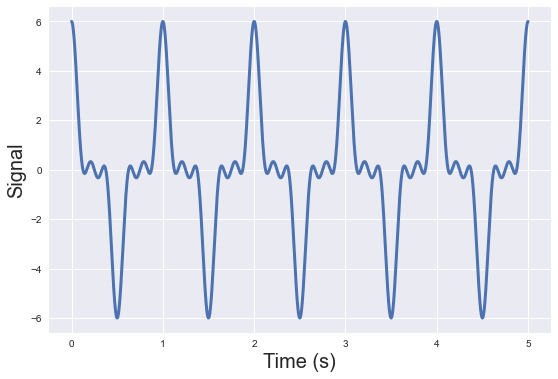

In [ ]:
def signal(t: np.ndarray, f: float) -> np.ndarray:
    return 3 * np.cos(2 * np.pi * f * t) + 2 * np.cos(6 * np.pi * f * t) + np.cos(10 * np.pi * f * t)

cycles = 5
N = scipy.fft.next_fast_len(250000)
hz = 1

t_min = 0
t_max = cycles / hz 
t, dt = np.linspace(t_min, t_max, N, retstep=True)
sampling_rate = 1 / dt

h = signal(t, hz)

print(f"Length of time   : {t_max:4.3f} seconds.")
print(f"Number of cycles : {cycles:4.3f} cycles.")
print(f"Sampling rate    : {1/dt:4.3f} Hz.")

plt.figure(figsize=(9,6))
plt.plot(t, h, linewidth=3)
plt.ylabel("Signal", fontsize=20)
plt.xlabel("Time (s)", fontsize=20)
plt.show()
plt.close()


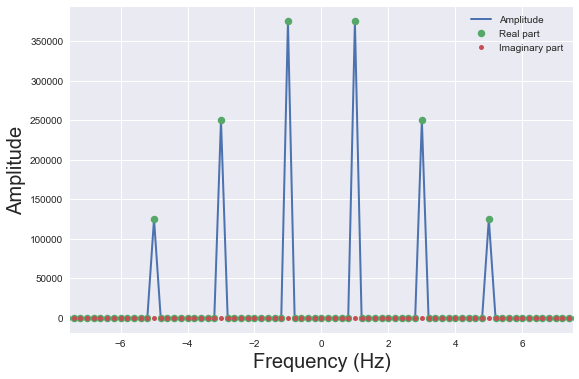

In [ ]:
H = scipy.fft.fft(h)
freq = scipy.fft.fftfreq(H.size, dt)

H = scipy.fft.fftshift(H)
freq = scipy.fft.fftshift(freq)

plt.figure(figsize=(9, 6))
plt.plot(freq, np.abs(H), "-", linewidth=2, label="Amplitude")
plt.plot(freq, np.real(H), ".", markersize=15, label="Real part")
plt.plot(freq, np.imag(H), ".", markersize=10, label="Imaginary part")
plt.xlim(-7.5 * hz, 7.5 * hz)
plt.legend()
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("Frequency (Hz)", fontsize=20)
plt.show()
plt.close()


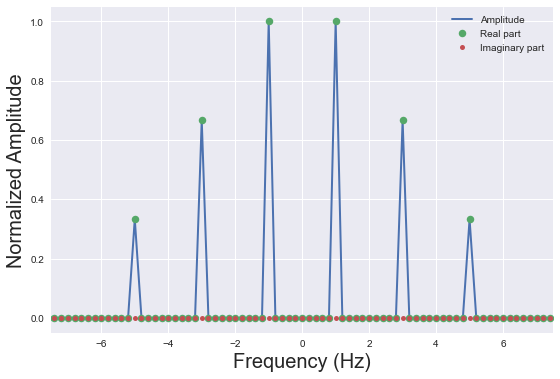

In [ ]:
normalized_H = H / np.max(np.abs(H))

plt.figure(figsize=(9, 6))
plt.plot(freq, np.abs(normalized_H), "-", linewidth=2, label="Amplitude")
plt.plot(freq, np.real(normalized_H), ".", markersize=15, label="Real part")
plt.plot(freq, np.imag(normalized_H), ".", markersize=10, label="Imaginary part")
plt.xlim(-7.5 * hz, 7.5 * hz)
plt.legend()
plt.ylabel("Normalized Amplitude", fontsize=20)
plt.xlabel("Frequency (Hz)", fontsize=20)
plt.show()
plt.close()
